In [1]:
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import cassiopeia as cas
from cassiopeia.tools import fitch_hartigan, fitch_count
import networkx as nx
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from enumeration import fitch_hartigan_enumeration, fitch_hartigan_print
from build_matrices import build_matrices, build_matrices_restricted, build_matrices_sankoff
from venn_diagram import venn_diagram, kl_divergence

In [2]:
tm = [None] * 101
rtm = [None] * 101
stm = [None] * 101
fc = [None] * 101

In [12]:
def show_plots(tm,fc,num):
    tm = tm[num]
    fc = fc[num]
    mask = np.zeros_like(tm)
    np.fill_diagonal(mask, 1)
    fig, axarr = plt.subplots(nrows = 1, ncols=2, figsize = (6, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} FitchCount'.format(num))
    for i in range(2):
        axarr[i].set_ylabel("Origin Tissue")
        axarr[i].set_xlabel("Destination Tissue")

    plt.tight_layout()
    plt.show()
def show_4_plots(tm,rtm,stm,fc,num):
    tm = tm[num] 
    rtm = rtm[num] 
    stm = stm[num] 
    fc = fc[num] 
    mask = np.zeros_like(fc)
    np.fill_diagonal(mask, 1)
    print("Co-migration F-H vs FitchCount KL Divergence:",kl_divergence(tm,fc))
    print("Restricted F-H vs FitcCount KL Divergence:",kl_divergence(rtm,fc))
    print("Sankoff vs FitchCount KL Divergence:",kl_divergence(stm,fc))
    print("Sankoff vs Co-migration F-H KL Divergence:",kl_divergence(stm,tm))
    print("Sankoff vs Restricted F-H KL Divergence:",kl_divergence(stm,rtm))
    print("Restricted F-H vs Co-migration F-H KL Divergence:",kl_divergence(rtm,tm))
    fig, axarr = plt.subplots(nrows = 1, ncols=4, figsize = (12, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(rtm,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(stm,square=True,mask=mask,ax=axarr[2],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[3],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} Restricted F-H'.format(num))
    axarr[2].set_title('CP0{} Sankoff'.format(num))
    axarr[3].set_title('CP0{} FitchCount'.format(num))
    for i in range(4):
        axarr[i].set_ylabel("Origin Tissue")
        axarr[i].set_xlabel("Destination Tissue")
    # plt.ylabel("Origin Tissue")
    # plt.xlabel("Destination Tissue")
    plt.tight_layout()
    plt.show()
def show_3_plots(tm,rtm,fc,num):
    tm = tm[num] 
    rtm = rtm[num] 
    fc = fc[num] 
    mask = np.zeros_like(fc)
    np.fill_diagonal(mask, 1)
    print("Co-migration F-H vs FitchCount KL Divergence:",kl_divergence(tm,fc),"\nRestricted F-H vs FitcCount KL Divergence:",kl_divergence(rtm,fc),"\nRestricted F-H vs Co-migration F-H KL Divergence:",kl_divergence(rtm,tm))
    fig, axarr = plt.subplots(nrows = 1, ncols=3, figsize = (9, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(rtm,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[2],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} Restricted F-H'.format(num))
    axarr[2].set_title('CP0{} FitchCount'.format(num))
    for i in range(3):
        axarr[i].set_ylabel("Origin Tissue")
        axarr[i].set_xlabel("Destination Tissue")
    # plt.ylabel("Origin Tissue")
    # plt.xlabel("Destination Tissue")
    plt.tight_layout()
    plt.show()

In [4]:
tm[70],fc[70] = build_matrices(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 6
Min comigrations: 5
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  3.0  3.0  4.0  0.0  2.0
RE   0.0  0.0  1.0  0.0  0.0  0.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   0.0  0.0  0.0  0.0  0.0  0.0
M2   0.0  0.0  0.0  0.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
raw FitchCount transition matrix
      LL   RE   RW    M1   M2  Liv
LL   0.0  7.0  7.0  12.0  0.0  2.0
RE   1.0  0.0  3.0   0.0  0.0  1.0
RW   1.0  3.0  0.0   0.0  0.0  1.0
M1   0.0  0.0  0.0   0.0  0.0  0.0
M2   0.0  0.0  0.0   0.0  0.0  0.0
Liv  2.0  1.0  1.0   0.0  0.0  0.0
normalized Fitch-Hartigan enumeration transition matrix
      LL    RE    RW        M1   M2       Liv
LL   0.0  0.25  0.25  0.333333  0.0  0.166667
RE   0.0  0.00  1.00  0.000000  0.0  0.000000
RW

In [5]:
rtm[70] = build_matrices_restricted(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 2
Min comigrations: 5
Number of trees that obey min comigrations 2
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  3.0  3.0  4.0  0.0  2.0
RE   0.0  0.0  1.0  0.0  0.0  0.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   0.0  0.0  0.0  0.0  0.0  0.0
M2   0.0  0.0  0.0  0.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
      LL    RE    RW        M1   M2       Liv
LL   0.0  0.25  0.25  0.333333  0.0  0.166667
RE   0.0  0.00  1.00  0.000000  0.0  0.000000
RW   0.0  1.00  0.00  0.000000  0.0  0.000000
M1   0.0  0.00  0.00  0.000000  0.0  0.000000
M2   0.0  0.00  0.00  0.000000  0.0  0.000000
Liv  0.0  0.00  0.00  0.000000  0.0  0.000000
beginning writing to files


In [6]:
stm[70] = build_matrices_sankoff(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 990
Min comigrations: 4
Number of trees that obey min comigrations 540
raw Sankoff enumeration transition matrix
      LL      RE      RW      M1   M2    Liv
LL   0.0  1080.0  1080.0  1080.0  0.0  540.0
RE   0.0     0.0     0.0     0.0  0.0    0.0
RW   0.0     0.0     0.0     0.0  0.0    0.0
M1   0.0     0.0     0.0     0.0  0.0    0.0
M2   0.0     0.0     0.0     0.0  0.0    0.0
Liv  0.0     0.0     0.0     0.0  0.0    0.0
normalized Sankoff enumeration transition matrix
      LL        RE        RW        M1   M2       Liv
LL   0.0  0.285714  0.285714  0.285714  0.0  0.142857
RE   0.0  0.000000  0.000000  0.000000  0.0  0.000000
RW   0.0  0.000000  0.000000  0.000000  0.0  0.000000
M1   0.0  0.000000  0.000000  0.000000  0.0  0.000000
M2   0.0  0.000000  0.000000  0.000000  0.0  0.000000
Liv  0.0  0.000000  0.00000

Co-migration F-H vs FitchCount KL Divergence: 1.817162647680599
Restricted F-H vs FitcCount KL Divergence: 1.8171614700855412
Sankoff vs FitchCount KL Divergence: 3.04524621309019
Sankoff vs Co-migration F-H KL Divergence: 2.1211547364645815
Sankoff vs Restricted F-H KL Divergence: 2.073207219619929
Restricted F-H vs Co-migration F-H KL Divergence: 0.0


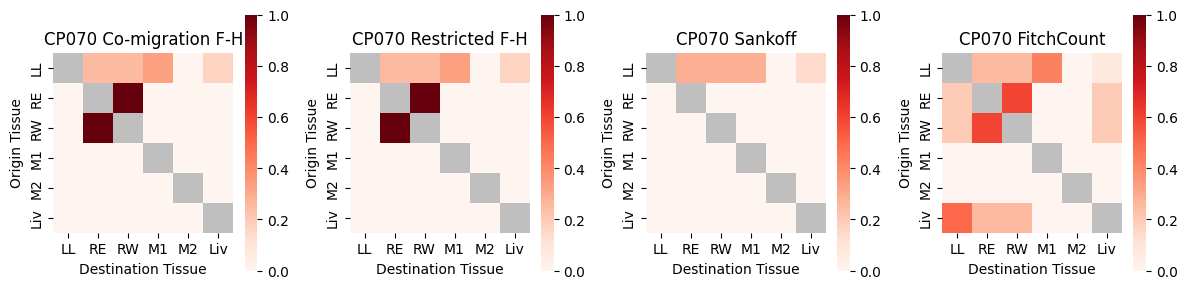

In [13]:
show_4_plots(tm,rtm,stm,fc,70)

In [26]:
venn_diagram(70)
print("--------- Co-migration only ---------")
venn_diagram(70,comig=True)

Restricted only 0
Sankoff only 988
Vanilla only 4
Restricted and Sankoff 0
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 2
--------- Co-migration only ---------
Restricted only 0
Sankoff only 540
Vanilla only 0
Restricted and Sankoff 0
Restricted and Vanilla 2
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


In [15]:
tm[64],fc[64] = build_matrices(64) # 12kb

/home/chunke/cs598MEB/trees/m5k_lg64_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 9
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  0.0  0.0  0.0  0.0
RE   0.0  0.0  1.0  0.0  0.0  4.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   2.0  6.0  0.0  0.0  6.0  0.0
M2   2.0  5.0  3.0  4.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
raw FitchCount transition matrix
      LL    RE    RW    M1    M2  Liv
LL   0.0   0.0   0.0   0.0   0.0  0.0
RE   0.0   0.0   4.0   0.0   0.0  8.0
RW   0.0   4.0   0.0   0.0   0.0  0.0
M1   8.0  20.0   0.0   0.0  24.0  4.0
M2   8.0  16.0  12.0  16.0   0.0  4.0
Liv  0.0   8.0   0.0   0.0   0.0  0.0
normalized Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2  Liv
LL   0.000000  0.000000  0.000000  0.000000  0.000000  0.0
R

In [16]:
rtm[64] = build_matrices_restricted(64) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg64_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 48
Min comigrations: 10
Number of trees that obey min comigrations 2
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  0.0  6.0  6.0  0.0
RE   0.0  0.0  1.0  0.0  0.0  4.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   2.0  6.0  0.0  0.0  0.0  0.0
M2   2.0  5.0  3.0  6.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
        LL      RE      RW     M1   M2  Liv
LL   0.000  0.0000  0.0000  0.500  0.5  0.0
RE   0.000  0.0000  0.2000  0.000  0.0  0.8
RW   0.000  1.0000  0.0000  0.000  0.0  0.0
M1   0.250  0.7500  0.0000  0.000  0.0  0.0
M2   0.125  0.3125  0.1875  0.375  0.0  0.0
Liv  0.000  0.0000  0.0000  0.000  0.0  0.0
beginning writing to files


Co-migration F-H vs FitchCount KL Divergence: 1.2944526305794077 
Restricted F-H vs FitcCount KL Divergence: 2.822946937062561 
Restricted F-H vs Co-migration F-H KL Divergence: 1.4971477507744737


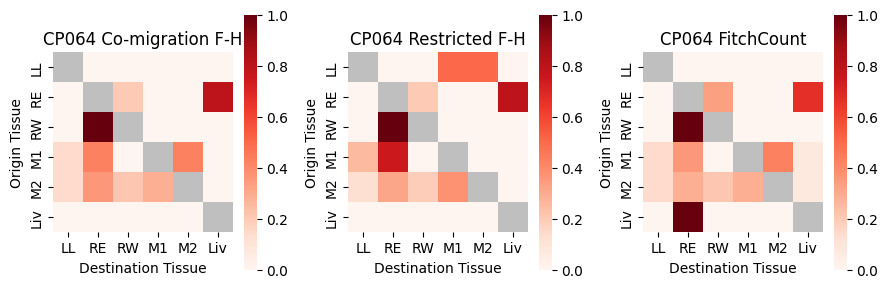

In [17]:
show_3_plots(tm,rtm,fc,64)

In [18]:
tm[43],fc[43] = build_matrices(43) # 30 kb

/home/chunke/cs598MEB/trees/m5k_lg43_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 10
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1    M2  Liv
LL   0.0  0.0  1.0  2.0   1.0  0.0
RE   0.0  0.0  0.0  0.0   0.0  0.0
RW   0.0  0.0  0.0  0.0   2.0  2.0
M1   4.0  4.0  7.0  0.0  13.0  4.0
M2   0.0  0.0  2.0  2.0   0.0  0.0
Liv  0.0  0.0  0.0  0.0   0.0  0.0
raw FitchCount transition matrix
       LL    RE    RW   M1    M2   Liv
LL    0.0   0.0   4.0  8.0   4.0   0.0
RE    0.0   0.0   0.0  0.0   0.0   0.0
RW    0.0   0.0   0.0  0.0   6.0   4.0
M1   16.0  16.0  26.0  0.0  52.0  18.0
M2    0.0   0.0   6.0  8.0   0.0   2.0
Liv   0.0   0.0   4.0  0.0   2.0   0.0
normalized Fitch-Hartigan enumeration transition matrix
        LL     RE       RW   M1       M2    Liv
LL   0.000  0.000  0.25000  0.5  0.25000  0.000
RE   0.0

In [19]:
rtm[43] = build_matrices_restricted(43)

/home/chunke/cs598MEB/trees/m5k_lg43_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 10
Number of trees that obey min comigrations 1
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  2.0  7.0  0.0  0.0
RE   0.0  0.0  0.0  0.0  0.0  0.0
RW   0.0  0.0  0.0  0.0  2.0  1.0
M1   1.0  2.0  3.0  0.0  6.0  2.0
M2   0.0  0.0  0.0  1.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2       Liv
LL   0.000000  0.000000  0.222222  0.777778  0.000000  0.000000
RE   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
RW   0.000000  0.000000  0.000000  0.000000  0.666667  0.333333
M1   0.071429  0.142857  0.214286  0.000000  0.428571  0.142857
M2   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000
Liv  0.0000

Co-migration F-H vs FitchCount KL Divergence: 1.2271182120719581 
Restricted F-H vs FitcCount KL Divergence: 1.9243384850799234 
Restricted F-H vs Co-migration F-H KL Divergence: 0.8143870847091988


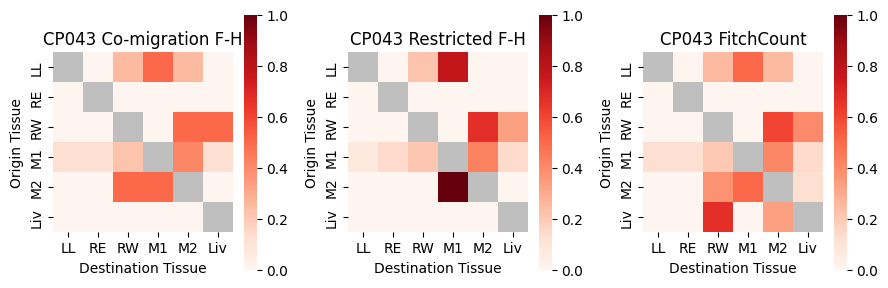

In [20]:
show_3_plots(tm,rtm,fc,43)

In [21]:
tm[21],fc[21] = build_matrices(21)

/home/chunke/cs598MEB/trees/m5k_lg21_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 3840
Min comigrations: 16
Number of trees that obey min comigrations 16
raw Fitch-Hartigan enumeration transition matrix
       LL     RE     RW     M1     M2    Liv
LL    0.0    0.0    0.0    0.0    0.0    0.0
RE    0.0    0.0    0.0    0.0   56.0   16.0
RW   32.0   48.0    0.0   48.0    0.0    8.0
M1    0.0  168.0  104.0    0.0  120.0  136.0
M2   16.0   40.0   80.0  128.0    0.0   32.0
Liv  32.0    0.0    8.0    0.0    0.0    0.0
raw FitchCount transition matrix
         LL       RE       RW       M1       M2      Liv
LL      0.0      0.0   1920.0    768.0      0.0      0.0
RE    768.0      0.0   3648.0  12544.0  15808.0   3840.0
RW   5760.0  10560.0      0.0  12288.0   1920.0   1920.0
M1   1152.0  27264.0  23232.0      0.0  24512.0  32640.0
M2   3840.0  13120.0  15360.0  27136.0      0.0   7680.0
Liv  7680.0      

In [22]:
rtm[21] = build_matrices_restricted(21)

/home/chunke/cs598MEB/trees/m5k_lg21_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
directory already exists
beginning enumeration
Number of trees: 1920
Min comigrations: 19
Number of trees that obey min comigrations 16
raw restricted Fitch-Hartigan enumeration transition matrix
       LL     RE    RW     M1     M2    Liv
LL    0.0   16.0  16.0   32.0    0.0    0.0
RE    0.0    0.0   0.0    0.0   56.0   16.0
RW   16.0   48.0   0.0   48.0    0.0    8.0
M1    0.0  152.0  88.0    0.0  120.0  136.0
M2   16.0   40.0  80.0  128.0    0.0   32.0
Liv  32.0    0.0   8.0    0.0    0.0    0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2       Liv
LL   0.000000  0.250000  0.250000  0.500000  0.000000  0.000000
RE   0.000000  0.000000  0.000000  0.000000  0.777778  0.222222
RW   0.133333  0.400000  0.000000  0.400000  0.000000  0.066667
M1   0.000000  0.306452  0.177419  0.000000  0.241935  0.274194
M

Co-migration F-H vs FitchCount KL Divergence: 1.6713044095113527 
Restricted F-H vs FitcCount KL Divergence: 0.8655890366582685 
Restricted F-H vs Co-migration F-H KL Divergence: 1.0131336426265045


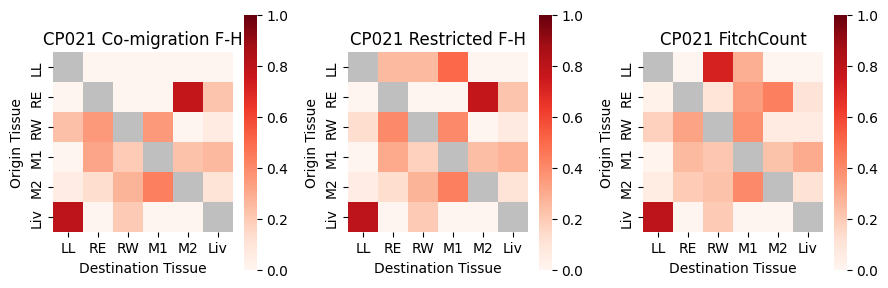

In [23]:
show_3_plots(tm,rtm,fc,21)

In [24]:
clones = [86,79,80,99,92,48,70]
for c in clones:
    try:
        print("Clone",c)
        print("F-H")
        tm[c],fc[c] = build_matrices(c,0)
        print("restricted F-H")
        rtm[c] = build_matrices_restricted(c,0)
        print("Sankoff")
        stm[c] = build_matrices_sankoff(c,0) 
    except:
        print("could not compute clone",c)

Clone 86
F-H
Number of trees: 2
Min comigrations: 3
Number of trees that obey min comigrations 2
restricted F-H
Number of trees: 1
Min comigrations: 5
Number of trees that obey min comigrations 1
Sankoff
Number of trees: 6
Min comigrations: 5
Number of trees that obey min comigrations 6
Clone 79
F-H
Number of trees: 6
Min comigrations: 3
Number of trees that obey min comigrations 6
restricted F-H
Number of trees: 2
Min comigrations: 4
Number of trees that obey min comigrations 2
Sankoff
Number of trees: 30
Min comigrations: 4
Number of trees that obey min comigrations 30
Clone 80
F-H
Number of trees: 4
Min comigrations: 4
Number of trees that obey min comigrations 4
restricted F-H
Number of trees: 2
Min comigrations: 5
Number of trees that obey min comigrations 2
Sankoff
Number of trees: 88
Min comigrations: 5
Number of trees that obey min comigrations 88
Clone 99
F-H
Number of trees: 1
Min comigrations: 6
Number of trees that obey min comigrations 1
restricted F-H
Number of trees: 8
M

Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 1.0366466521191622
Sankoff vs FitchCount KL Divergence: 1.002860026916269
Sankoff vs Co-migration F-H KL Divergence: 1.0366403955290184
Sankoff vs Restricted F-H KL Divergence: 1.047436643684468e-06
Restricted F-H vs Co-migration F-H KL Divergence: 1.0028456892162645


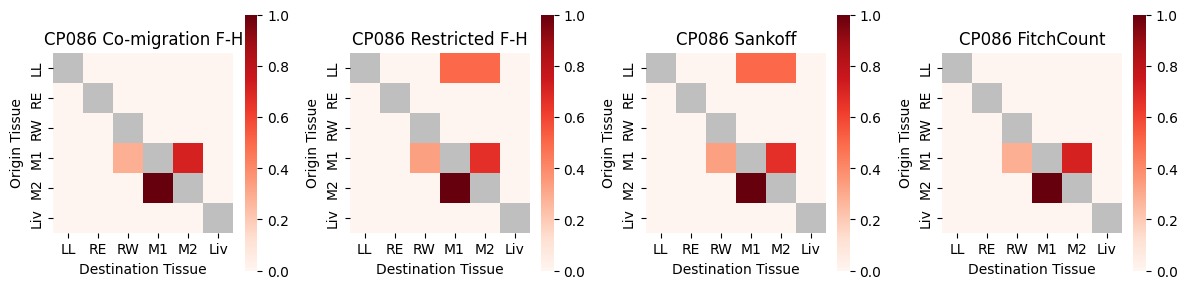

In [25]:
show_4_plots(tm,rtm,stm,fc,86)

In [27]:
venn_diagram(86)
print("--------- Co-migration only ---------")
venn_diagram(86,comig=True)

Restricted only 0
Sankoff only 5
Vanilla only 2
Restricted and Sankoff 1
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 0
Sankoff only 5
Vanilla only 2
Restricted and Sankoff 1
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 3.959782495414054
Sankoff vs FitchCount KL Divergence: 3.921781547618098
Sankoff vs Co-migration F-H KL Divergence: 3.7938321102609516
Sankoff vs Restricted F-H KL Divergence: 0.004352820603629331
Restricted F-H vs Co-migration F-H KL Divergence: 3.6696178715372363


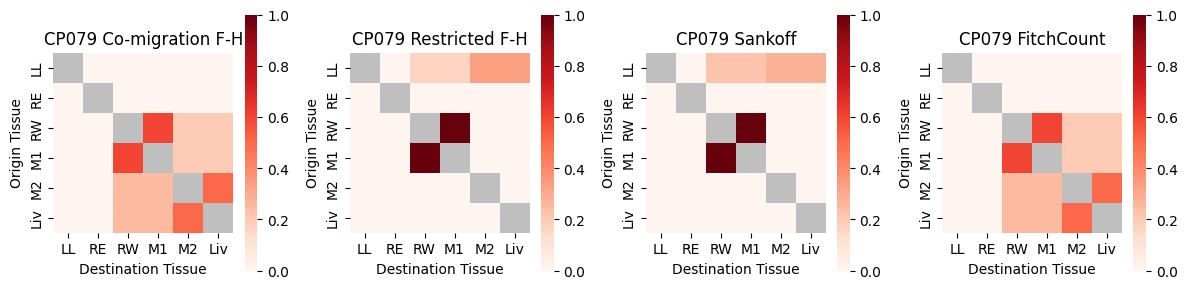

In [28]:
show_4_plots(tm,rtm,stm,fc,79)

In [29]:
venn_diagram(79)
print("--------- Co-migration only ---------")
venn_diagram(79,comig=True)

Restricted only 0
Sankoff only 28
Vanilla only 6
Restricted and Sankoff 2
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 0
Sankoff only 28
Vanilla only 6
Restricted and Sankoff 2
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 2.394192287684854
Sankoff vs FitchCount KL Divergence: 2.364834559399391
Sankoff vs Co-migration F-H KL Divergence: 2.3293058992245776
Sankoff vs Restricted F-H KL Divergence: 0.004912360186834403
Restricted F-H vs Co-migration F-H KL Divergence: 2.250521631274507


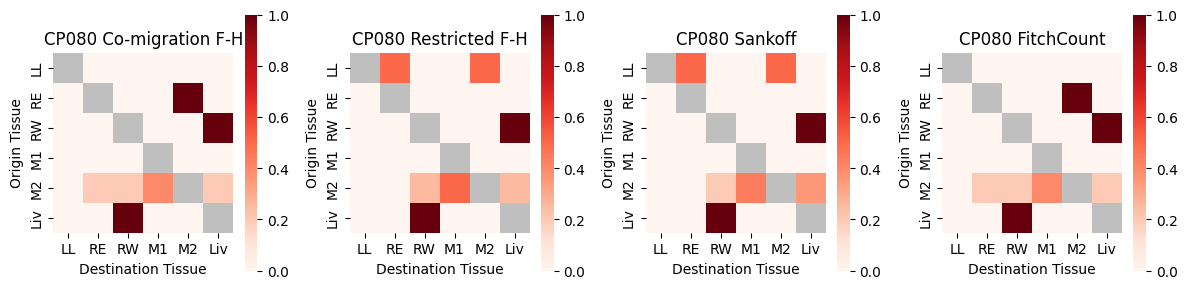

In [30]:
show_4_plots(tm,rtm,stm,fc,80)

In [31]:
venn_diagram(80)
print("--------- Co-migration only ---------")
venn_diagram(80,comig=True)

Restricted only 0
Sankoff only 86
Vanilla only 4
Restricted and Sankoff 2
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 0
Sankoff only 86
Vanilla only 4
Restricted and Sankoff 2
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 3.1718702427295393
Sankoff vs FitchCount KL Divergence: 1.1711305624984867
Sankoff vs Co-migration F-H KL Divergence: 1.1628488160297321
Sankoff vs Restricted F-H KL Divergence: 2.5969407494750785
Restricted F-H vs Co-migration F-H KL Divergence: 3.0551893945882784


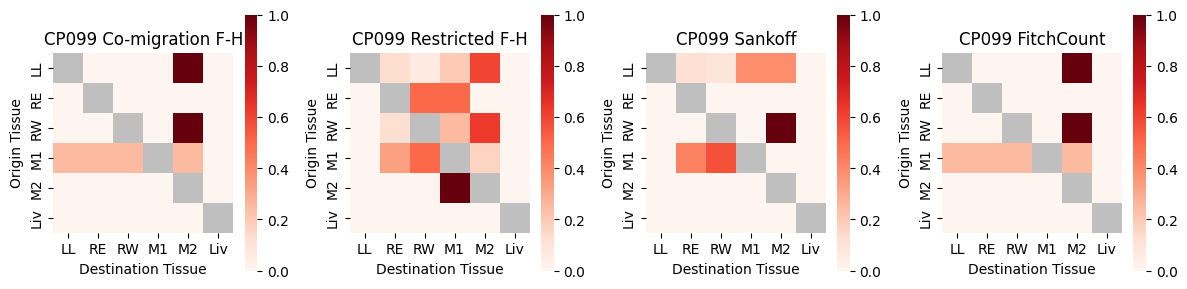

In [32]:
show_4_plots(tm,rtm,stm,fc,99)

In [33]:
venn_diagram(99)
print("--------- Co-migration only ---------")
venn_diagram(99,comig=True)

Restricted only 0
Sankoff only 2692
Vanilla only 1
Restricted and Sankoff 8
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 5
Sankoff only 256
Vanilla only 1
Restricted and Sankoff 0
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 1.042518583644932
Sankoff vs FitchCount KL Divergence: 3.099288547488692
Sankoff vs Co-migration F-H KL Divergence: 3.0175513498730493
Sankoff vs Restricted F-H KL Divergence: 2.1822193454089036
Restricted F-H vs Co-migration F-H KL Divergence: 1.0087177855142353


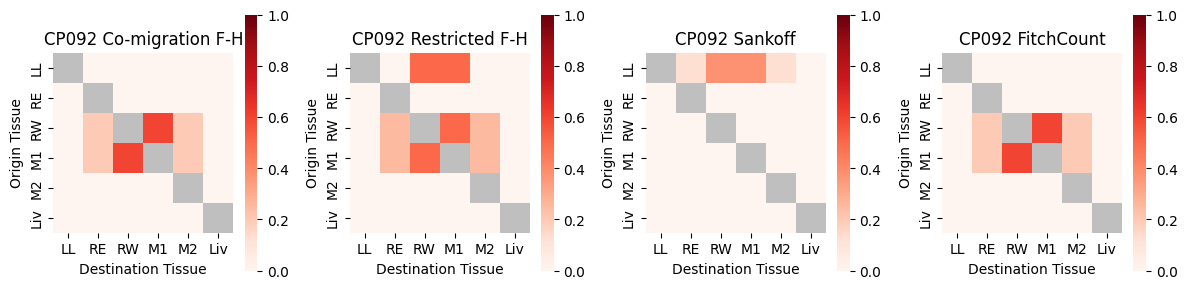

In [34]:
show_4_plots(tm,rtm,stm,fc,92)

In [35]:
venn_diagram(92)
print("--------- Co-migration only ---------")
venn_diagram(92,comig=True)

Restricted only 0
Sankoff only 10848
Vanilla only 2
Restricted and Sankoff 12
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 2
Sankoff only 1296
Vanilla only 2
Restricted and Sankoff 0
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0


Co-migration F-H vs FitchCount KL Divergence: 0.0
Restricted F-H vs FitcCount KL Divergence: 1.0935241740245347
Sankoff vs FitchCount KL Divergence: 1.010907811812336
Sankoff vs Co-migration F-H KL Divergence: 1.0446876936286467
Sankoff vs Restricted F-H KL Divergence: 0.27594142510217395
Restricted F-H vs Co-migration F-H KL Divergence: 1.0597211974156935


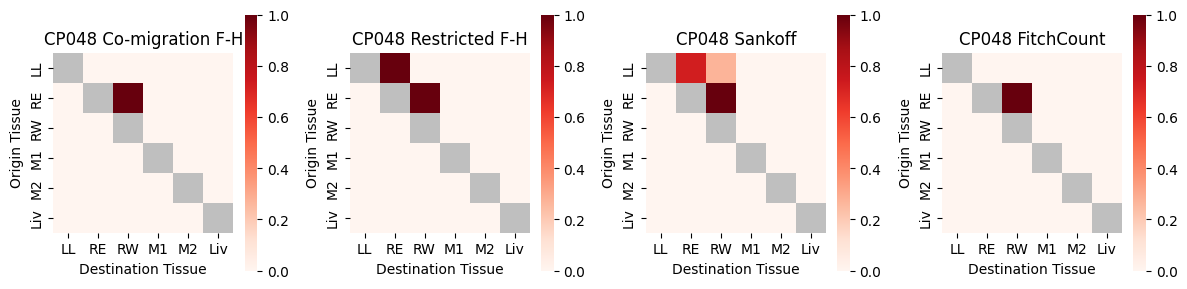

In [36]:
show_4_plots(tm,rtm,stm,fc,48)

In [37]:
venn_diagram(48)
print("--------- Co-migration only ---------")
venn_diagram(48,comig=True)

Restricted only 0
Sankoff only 13
Vanilla only 1
Restricted and Sankoff 2
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
--------- Co-migration only ---------
Restricted only 0
Sankoff only 11
Vanilla only 1
Restricted and Sankoff 1
Restricted and Vanilla 0
Sankoff and Vanilla 0
Restricted and Sankoff and Vanilla 0
